# Proyek Analisis Data: "E-Commerce Public Dataset"

- **Nama:** [Fuad Azaim Siraj]
- **Email:** [azaimfuad216@gmail.com]
- **ID Dicoding:** [sejaksedari]

## Menentukan Pertanyaan Bisnis

* Pertanyaan 1: Bagaimana pola penjualan yang terjadi pada dataset E-Commerce dilihat dari banyaknya order? kemudian, bagaimana demografi pelanggan yang melakukan order dilihat dari faktor region?

* Pertanyaan 2: Kapan pelanggan terakhir kali bertransaksi, seberapa sering, berapa banyak spendingnya, serta siapakah pelanggan tersebut?

## Import Semua Packages/Library yang Digunakan

Gathering Data from Personal Github https://github.com/sejaksedari/dcoding_DS/tree/main/submission/data

In [70]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

##Data Wrangling

### Gathering Data

In [71]:
# Load orders_dataset
orders_dataset_df = pd.read_csv("https://github.com/sejaksedari/dcoding_DS/raw/main/submission/data/orders_dataset.csv")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [72]:
# Load customers_dataset
customers_dataset_df = pd.read_csv("https://github.com/sejaksedari/dcoding_DS/raw/main/submission/data/customers_dataset.csv")
customers_dataset_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [73]:
# Load order_items_dataset
order_items_dataset_df = pd.read_csv("https://github.com/sejaksedari/dcoding_DS/raw/main/submission/data/order_items_dataset.csv")
order_items_dataset_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [74]:
# Load order_reviews_dataset
order_reviews_dataset_df = pd.read_csv("https://github.com/sejaksedari/dcoding_DS/raw/main/submission/data/order_reviews_dataset.csv")
order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [75]:
# Load order_payments_dataset
order_payments_dataset_df = pd.read_csv("https://github.com/sejaksedari/dcoding_DS/raw/main/submission/data/order_payments_dataset.csv")
order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [76]:
# Load products_dataset
products_dataset_df = pd.read_csv("https://github.com/sejaksedari/dcoding_DS/raw/main/submission/data/products_dataset.csv")
products_dataset_df.head(100)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
95,af16005fca813272caf59c432153949e,moveis_decoracao,55.0,1186.0,2.0,800.0,53.0,8.0,20.0
96,e6a1ff3552ba3305c1cf0a4dde50347f,automotivo,58.0,703.0,6.0,5250.0,47.0,19.0,23.0
97,d8a405c732027a2af3187b031890933d,automotivo,50.0,361.0,1.0,200.0,35.0,4.0,26.0
98,ce94e3c41145e28428cdae952a1fd7f2,relogios_presentes,58.0,899.0,2.0,335.0,17.0,11.0,12.0


In [77]:
# Load sellers_dataset
sellers_dataset_df = pd.read_csv("https://github.com/sejaksedari/dcoding_DS/raw/main/submission/data/sellers_dataset.csv")
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [78]:
# Load geolocation_dataset
geolocation_dataset_df = pd.read_csv("https://github.com/sejaksedari/dcoding_DS/raw/main/submission/data/geolocation_dataset.csv")
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [79]:
# Load product_category_name_translation
product_category_name_translation_df = pd.read_csv("https://github.com/sejaksedari/dcoding_DS/raw/main/submission/data/product_category_name_translation.csv")
product_category_name_translation_df.head()


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


TO DO LIST [KANBAN BOARD]
* orders_dataset_df [Assessed] [Cleaned]
* customers_dataset_df [Assessed] [Cleaned]
* order_items_dataset_df [Assessed] [Cleaned]
* order_reviews_dataset_df [Assessed] [Cleaned]
* order_payments_dataset_df [Assessed] [Cleaned]
* products_dataset_df [Assessed] [Cleaned]
* sellers_dataset_df [Assessed] [Cleaned]
* geolocation_dataset_df [Assessed] [Cleaned]
* product_category_name_translation_df [Assessed] [Utilised]


###Assessing Data

In [80]:
# Menilai data orders_dataset_df

# cek jumlah baris & kolom
print("\nCek jumlah Baris dan Kolom:\n")
count_baris = orders_dataset_df.shape[0]
print("total baris: ", count_baris)
count_kolom = orders_dataset_df.shape[1]
print("total kolom: ", count_kolom)

# cek tipe data
print("\nCek Tipe Data:\n")
orders_dataset_df.info()
# Result: data type masih bentuk objek semua, perlu diganti

# cek missing values (null)
print("\nCek Missing Values:\n")
print(orders_dataset_df.isna().sum())
# Result:  160 @order_approved_at, 1783 @order_delivered_carrier_date, 2965 @delivered_customer_date

# cek duplicate values
nilaiDuplicate = orders_dataset_df.duplicated().sum()
print(f"\nCek Duplicate Values: {nilaiDuplicate}\n")
# Result: no duplicate

# cek statistic summary
orders_dataset_df.describe(include='all')


Cek jumlah Baris dan Kolom:

total baris:  99441
total kolom:  8

Cek Tipe Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Cek Missing Values:

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [81]:
# cek missing values
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [82]:
# cek mising values count
orders_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [83]:
# Menilai data customers_dataset_df

# cek jumlah baris & kolom
print("\nCek jumlah Baris dan Kolom:\n")
count_baris = customers_dataset_df.shape[0]
print("total baris: ", count_baris)
count_kolom = customers_dataset_df.shape[1]
print("total kolom: ", count_kolom)

# cek tipe data
print("\nCek Tipe Data:\n")
customers_dataset_df.info()
# Result: aman

# cek missing values (null)
print("\nCek Missing Values:\n")
print(customers_dataset_df.isna().sum())
# Result:  no missing values

# cek duplicate values
nilaiDuplicate = customers_dataset_df.duplicated().sum()
print(f"\nCek Duplicate Values: {nilaiDuplicate}\n")
# Result: no duplicates

# cek statistic summary
customers_dataset_df.describe(include='all')


Cek jumlah Baris dan Kolom:

total baris:  99441
total kolom:  5

Cek Tipe Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Cek Missing Values:

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Cek Duplicate Values: 0



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [84]:
# Menilai data order_items_dataset_df

# cek jumlah baris & kolom
print("\nCek jumlah Baris dan Kolom:\n")
count_baris = order_items_dataset_df.shape[0]
print("total baris: ", count_baris)
count_kolom = order_items_dataset_df.shape[1]
print("total kolom: ", count_kolom)

# cek tipe data
print("\nCek Tipe Data:\n")
order_items_dataset_df.info()
# Result: ada data type yang perlu diganti such as shipping_limit_date

# cek missing values (null)
print("\nCek Missing Values:\n")
print(order_items_dataset_df.isna().sum())
# Result:  no missing values

# cek duplicate values
nilaiDuplicate = order_items_dataset_df.duplicated().sum()
print(f"\nCek Duplicate Values: {nilaiDuplicate}\n")
# Result: no duplicates

# cek statistic summary
order_items_dataset_df.describe(include='all')
# Result: [NOT YET, kayanya gara2 data types belom bener]


Cek jumlah Baris dan Kolom:

total baris:  112650
total kolom:  7

Cek Tipe Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Cek Missing Values:

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Cek Duplicate Values: 0



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [85]:
# identify char length on id
stringz = "e481f51cbdc54678b7cc49136f2d6af7"
print(len(stringz))

32


In [86]:
# Menilai data order_reviews_dataset_df

# cek jumlah baris & kolom
print("\nCek jumlah Baris dan Kolom:\n")
count_baris = order_reviews_dataset_df.shape[0]
print("total baris: ", count_baris)
count_kolom = order_reviews_dataset_df.shape[1]
print("total kolom: ", count_kolom)

# cek tipe data
print("\nCek Tipe Data:\n")
order_reviews_dataset_df.info()
# Result: date object --> datetime

# cek missing values (null)
print("\nCek Missing Values:\n")
print(order_reviews_dataset_df.isna().sum())
# Result: Missing 87656 @review_comment_title & 58247 @review_comment_message

# cek duplicate values
nilaiDuplicate = order_reviews_dataset_df.duplicated().sum()
print(f"\nCek Duplicate Values: {nilaiDuplicate}\n")
# Result: no duplicates

# cek statistic summary
order_reviews_dataset_df.describe(include='all')


Cek jumlah Baris dan Kolom:

total baris:  99224
total kolom:  7

Cek Tipe Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Cek Missing Values:

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Cek Duplicate V

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [87]:
# Menilai data order_payments_dataset_df

# cek jumlah baris & kolom
print("\nCek jumlah Baris dan Kolom:\n")
count_baris = order_payments_dataset_df.shape[0]
print("total baris: ", count_baris)
count_kolom = order_payments_dataset_df.shape[1]
print("total kolom: ", count_kolom)

# cek tipe data
print("\nCek Tipe Data:\n")
order_payments_dataset_df.info()
# Result: aman

# cek missing values (null)
print("\nCek Missing Values:\n")
print(order_payments_dataset_df.isna().sum())
# Result: no Missing values

# cek duplicate values
nilaiDuplicate = order_payments_dataset_df.duplicated().sum()
print(f"\nCek Duplicate Values: {nilaiDuplicate}\n")
# Result: no duplicates

# cek statistic summary
order_payments_dataset_df.describe(include='all')


Cek jumlah Baris dan Kolom:

total baris:  103886
total kolom:  5

Cek Tipe Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Cek Missing Values:

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Cek Duplicate Values: 0



,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [88]:
# Menilai data products_dataset_df

# cek jumlah baris & kolom
print("\nCek jumlah Baris dan Kolom:\n")
count_baris = products_dataset_df.shape[0]
print("total baris: ", count_baris)
count_kolom = products_dataset_df.shape[1]
print("total kolom: ", count_kolom)

# cek tipe data
print("\nCek Tipe Data:\n")
products_dataset_df.info()
# Result: aman

# cek missing values (null)
print("\nCek Missing Values:\n")
print(products_dataset_df.isna().sum())
# Result: semua kecuali product_id ada yg missing

# cek duplicate values
nilaiDuplicate = products_dataset_df.duplicated().sum()
print(f"\nCek Duplicate Values: {nilaiDuplicate}\n")
# Result: no duplicates

# cek statistic summary
products_dataset_df.describe(include='all')


Cek jumlah Baris dan Kolom:

total baris:  32951
total kolom:  9

Cek Tipe Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Cek Missing Values:

product_id                      0
product_category_name         610
product_name_lenght           610
produc

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [89]:
products_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [90]:
# Menilai data sellers_dataset_df

# cek jumlah baris & kolom
print("\nCek jumlah Baris dan Kolom:\n")
count_baris = sellers_dataset_df.shape[0]
print("total baris: ", count_baris)
count_kolom = sellers_dataset_df.shape[1]
print("total kolom: ", count_kolom)

# cek tipe data
print("\nCek Tipe Data:\n")
sellers_dataset_df.info()
# Result: aman

# cek missing values (null)
print("\nCek Missing Values:\n")
print(sellers_dataset_df.isna().sum())
# Result: no missing values

# cek duplicate values
nilaiDuplicate = sellers_dataset_df.duplicated().sum()
print(f"\nCek Duplicate Values: {nilaiDuplicate}\n")
# Result: no duplicates

# cek statistic summary
sellers_dataset_df.describe(include='all')


Cek jumlah Baris dan Kolom:

total baris:  3095
total kolom:  4

Cek Tipe Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Cek Missing Values:

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Cek Duplicate Values: 0



,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [91]:
# Menilai data geolocation_dataset_df

# cek jumlah baris & kolom
print("\nCek jumlah Baris dan Kolom:\n")
count_baris = geolocation_dataset_df.shape[0]
print("total baris: ", count_baris)
count_kolom = geolocation_dataset_df.shape[1]
print("total kolom: ", count_kolom)

# cek tipe data
print("\nCek Tipe Data:\n")
geolocation_dataset_df.info()
# Result: Aman

# cek missing values (null)
print("\nCek Missing Values:\n")
print(geolocation_dataset_df.isna().sum())
# Result: no missing values

# cek duplicate values
nilaiDuplicate = geolocation_dataset_df.duplicated().sum()
print(f"\nCek Duplicate Values: {nilaiDuplicate}\n")
# Result: Duplicate tidak masalah karena data kota

# cek statistic summary
geolocation_dataset_df.describe(include='all')
# Result: Aman


Cek jumlah Baris dan Kolom:

total baris:  1000163
total kolom:  5

Cek Tipe Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Cek Missing Values:

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Cek Duplicate Values: 261831



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [92]:
# Menilai data product_category_name_translation_df

# cek jumlah baris & kolom
print("\nCek jumlah Baris dan Kolom:\n")
count_baris = product_category_name_translation_df.shape[0]
print("total baris: ", count_baris)
count_kolom = product_category_name_translation_df.shape[1]
print("total kolom: ", count_kolom)

# cek tipe data
print("\nCek Tipe Data:\n")
product_category_name_translation_df.info()
# Result: Aman, object (string) semua

# cek missing values (null)
print("\nCek Missing Values:\n")
print(product_category_name_translation_df.isna().sum())
# Result: no missing values

# cek duplicate values
nilaiDuplicate = product_category_name_translation_df.duplicated().sum()
print(f"\nCek Duplicate Values: {nilaiDuplicate}\n")
# Result: no duplicates

# cek statistic summary
product_category_name_translation_df.describe(include='all')
# Result: Aman


Cek jumlah Baris dan Kolom:

total baris:  71
total kolom:  2

Cek Tipe Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Cek Missing Values:

product_category_name            0
product_category_name_english    0
dtype: int64

Cek Duplicate Values: 0



,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [93]:
# Overview Data Assessment Keseluruhan

# Buat list datasets beserta nama yang akan diassign untuk kompilasi overview
datasets = [orders_dataset_df, customers_dataset_df, order_items_dataset_df, order_reviews_dataset_df, order_payments_dataset_df,
            products_dataset_df, sellers_dataset_df, geolocation_dataset_df, product_category_name_translation_df]
names = ['orders_dataset_df', 'customers_dataset_df', 'order_items_dataset_df', 'order_reviews_dataset_df', 'order_payments_dataset_df',
         'products_dataset_df', 'sellers_dataset_df', 'geolocation_dataset_df', 'product_category_name_translation_df']

# Buat dataframe baru untuk kompilasi overview
# inisialisasi DataFrame kosong
data_info = pd.DataFrame({})
# buat kolom nama_dataset ke data_info dan assign value dari list 'names'
data_info['nama_dataset'] = names
# list kolom
data_info['list_kolom'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
# iterasi jumlah baris tiap dataframe dari list 'datasets', assign ke kolom jml_baris'
data_info['jml_baris'] = [df.shape[0] for df in datasets]
# iterasi jumlah kolom tiap dataframe dari list 'datasets', assign ke kolom jml_kolom'
data_info['jml_kolom'] = [df.shape[1] for df in datasets]
# iterasi jumlah duplikat tiap dataframe dari list 'datasets', assign ke kolom jml_duplikat'
data_info['jml_duplikat'] = [df.duplicated().sum() for df in datasets]
# iterasi jumlah null tiap dataframe (double.sum()) dari list 'datasets', assign ke kolom jml_missing_element'
data_info['jml_missing_element'] = [df.isnull().sum().sum() for df in datasets]
# count jumlah kolom dengan null values di tiap dataframe  dari list 'datasets'
data_info['jml_missing_kolom'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
# tampilkan semua kolom dengan null values tadi
data_info['detail_missing_kolom'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

# beri background gradient agar data_info mudah terbaca
data_info.style.background_gradient(cmap='YlGnBu')

,nama_dataset,list_kolom,jml_baris,jml_kolom,jml_duplikat,jml_missing_element,jml_missing_kolom,detail_missing_kolom
0,orders_dataset_df,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
1,customers_dataset_df,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,0,
2,order_items_dataset_df,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,0,
3,order_reviews_dataset_df,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,2,"review_comment_title, review_comment_message"
4,order_payments_dataset_df,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,0,
5,products_dataset_df,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
6,sellers_dataset_df,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,0,
7,geolocation_dataset_df,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,0,
8,product_category_name_translation_df,"product_category_name, product_category_name_english",71,2,0,0,0,


Overview pertama berisi kompilasi seluruh dataset dengan atribut nama, jumlah baris, jumlah kolom, jumlah duplikat, jumlah missing elemen, jumlah missing kolom, dan kolom apa saja yang memiliki missing value.

In [94]:
# Buat fungsi untuk nge-generate dataframe 'df_overview' dengan kolom2 berikut
def data_overview(df):
    overview = pd.DataFrame({
        # nama kolom
        'feature': df.columns,
        # count null di tiap kolom [MASIH ERROR, kok ada Missing Valuenya?]
        'jml_null': df.isnull().sum().values,
        # presentase null di tiap kolom, buat judge mau diatasin dengan metode apa null ini
        # presentasi null terhadap total baris
        'percent_null': df.isnull().mean().values * 100,
        # tipe data
        'dtype': df.dtypes.values,
        # jumlah unique values di tiap kolom (kalo koom bertipe 'object')
        'qtd_cat': [df[col].nunique() if df[col].dtype == 'object' else 0 for col in df.columns]
    })
    return overview

# bikin empty dataframe
df_overview = pd.DataFrame({})
name_col = []

# bikin loop untuk mengumpulkan detail state dari semua kolom pada semua dataset
for name, df in zip(names, datasets):
    name_col += [name] * df.shape[1]
    df_overview = pd.concat([df_overview, data_overview(df)], ignore_index=True)
    df_overview['dataset_name'] = name_col

# urutkan kolom, lalu tampilkan dataframe yang sudah terisi dengan loop iterasi tadi
df_overview = df_overview.loc[:, ['dataset_name', 'feature', 'jml_null', 'percent_null', 'dtype', 'qtd_cat']]
df_overview

,dataset_name,feature,jml_null,percent_null,dtype,qtd_cat
0,orders_dataset_df,order_id,0,0.000000,object,99441
1,orders_dataset_df,customer_id,0,0.000000,object,99441
2,orders_dataset_df,order_status,0,0.000000,object,8
3,orders_dataset_df,order_purchase_timestamp,0,0.000000,object,98875
4,orders_dataset_df,order_approved_at,160,0.160899,object,90733
5,orders_dataset_df,order_delivered_carrier_date,1783,1.793023,object,81018
6,orders_dataset_df,order_delivered_customer_date,2965,2.981668,object,95664
7,orders_dataset_df,order_estimated_delivery_date,0,0.000000,object,459
8,customers_dataset_df,customer_id,0,0.000000,object,99441
9,customers_dataset_df,customer_unique_id,0,0.000000,object,96096


Overview kedua berisi sebuah dataframe untuk melakukan transformasi data type, mengecek jumlah null nanti setelah dilakukan proses cleaning, dan sebagainya.

###Cleaning Data

Cleaning @Dataset ***orders_dataset_df***

Handling **Missing Values**

In [95]:
# ada banyak null di 3 kolom berisi data tanggal, Decision: DROP

# Cek berapa persen data terhapus apabila terdrop
order_approved_at =(160/90733) # '{:.1%}'.format()
print(order_approved_at, " or ", '{:.2%}'.format(order_approved_at))
order_delivered_carrier_date = (1783/81018)
print(order_delivered_carrier_date, " or ", '{:.2%}'.format(order_delivered_carrier_date))
order_delivered_customer_date = (2965/95664)
print(order_delivered_customer_date, " or ", '{:.2%}'.format(order_delivered_customer_date))
print(type(order_delivered_customer_date))


# anggap ketiga kolom mutually exclusive, total kemungkinan terburuk data terhapus sebanyak: 5.48%
# threshold masih kecil lah 5%, Decision: DROP
# make a LIST to be summarize
null_col = [order_approved_at, order_delivered_carrier_date, order_delivered_customer_date]
total_null_col = np.sum(null_col)
print(total_null_col, " or ", '{:.2%}'.format(total_null_col))


0.0017634157362811766  or  0.18%
0.02200745513342714  or  2.20%
0.030993895300217428  or  3.10%
<class 'float'>
0.05476476616992575  or  5.48%


In [96]:
# cek missing sebelum drop
orders_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [97]:
# Drop rows dengan missing values di beberapa kolom spesifik
columns_with_missing = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
orders_dataset_df = orders_dataset_df.dropna(subset=columns_with_missing)

# cek missing setelah drop
orders_dataset_df.isna().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [98]:
# missing values di orders_dataset_df sudah terdrop
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


**Transform data type** date from object into datetime64:
specifically, kolom2 berikut:
 * order_purchase_timestamp
 * order_approved_at
 * order_delivered_carrier_date
 * order_delivered_customer_date
 * order_estimated_delivery_date

In [99]:
# Convert specified columns to datetime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in datetime_columns:
    orders_dataset_df[col] = pd.to_datetime(orders_dataset_df[col])

# Cek lagi DataFrame yang telah diubah format data typenya
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


<ipython-input-99-c786148582d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_dataset_df[col] = pd.to_datetime(orders_dataset_df[col])
<ipython-input-99-c786148582d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_dataset_df[col] = pd.to_datetime(orders_dataset_df[col])
<ipython-input-99-c786148582d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [100]:
# Buat beberapa atribut baru dari oder_purchase_timestamp - year & month
orders_dataset_df['order_purchase_year'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.year)
orders_dataset_df['order_purchase_month'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.month)
orders_dataset_df['order_purchase_month_name'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders_dataset_df['order_purchase_year_month'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
orders_dataset_df['order_purchase_date'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Buat beberapa atribut baru dari oder_purchase_timestamp - day & dayofweek
orders_dataset_df['order_purchase_day'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.day)
orders_dataset_df['order_purchase_dayofweek'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders_dataset_df['order_purchase_dayofweek_name'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Buat beberapa atribut baru dari oder_purchase_timestamp - hour & time_day
orders_dataset_df['order_purchase_hour'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
orders_dataset_df['order_purchase_time_day'] = pd.cut(orders_dataset_df['order_purchase_hour'], hours_bins, labels=hours_labels)

# DataFrame orders_dataset setelah transformasi datetime
orders_dataset_df.head()

<ipython-input-100-a4fcd9f18eec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_dataset_df['order_purchase_year'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.year)
<ipython-input-100-a4fcd9f18eec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_dataset_df['order_purchase_month'] = orders_dataset_df['order_purchase_timestamp'].apply(lambda x: x.month)
<ipython-input-100-a4fcd9f18eec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,201802,20180213,13,1,Tue,21,Night


In [101]:
# Cek lagi DataFrame yang telah diubah format data typenya
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 8   order_purchase_year            96461 non-null  int64         
 9   order_purchase_month           96461 non-null  int64         
 10  order_purchase_month_name      96461 non-null  object        
 11  order_purchase_year_

Cleaning @Dataset ***customers_dataset_df***

In [102]:
# Tidak ada duplikat, missing element, dan data tipe yang keliru. Jadi, proses data cleaning tidak dilakukan.

Cleaning @Dataset ***order_items_dataset_df***

In [103]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [104]:
# Transform tipe data pada kolom shipping_limit_date dari 'Object' ke 'datetime64'

# Convert specified columns to datetime
datetime_columns = ['shipping_limit_date']

for col in datetime_columns:
    order_items_dataset_df[col] = pd.to_datetime(order_items_dataset_df[col])

# Cek lagi DataFrame yang telah diubah format data typenya
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Cleaning @Dataset ***order_reviews_dataset_df***

In [105]:
# terlihat pada dataset order_reviews_dataset_df
# kolom review_comment_title memiliki 87656 missing values, dan
# kolom review_comment_message memiliki 58247 missing values

# isi kedua kolom tersebut berupa komentar terhadap produk
# tetapi, karena user memiliki hak untuk mengisi atau tidak pada form komentar
# maka, setiap baris yang mengandung null pada dataset ini TIDAK AKAN DIHAPUS/DIDROP

# Terakhir, perubahan dilakukan hanya untuk mentransform data datetime di 2 kolom terakhir


# Transform tipe data pada kolom 2 kolom terakhir dari 'Object' ke 'datetime64'

# Convert specified columns to datetime
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for col in datetime_columns:
    order_reviews_dataset_df[col] = pd.to_datetime(order_reviews_dataset_df[col])

# Cek lagi DataFrame yang telah diubah format data typenya
order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Cleaning @Dataset ***order_payments_dataset_df***

In [106]:
# Tidak ada duplikat, missing element, dan data tipe yang keliru. Jadi, proses data cleaning tidak dilakukan.

Cleaning @Dataset ***products_dataset_df***

In [107]:
# Recheck missing sebelum drop
products_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [108]:
# Seperti terlihat pada tabel overview sebelumnya, ada banyak missing values di dataset ini
  # product_category name           : 610 missing values
  # product_name_lenght             : 610 missing values     # length = lenght
  # product_description_lenght      : 610 missing values     # length = lenght
  # product_photos_qty              : 610 missing values
  # product_weight_g                : 2 missing values
  # product_length_cm               : 2 missing values
  # product_height_cm               : 2 missing values
  # product_width_cm                : 2 missing values

  # Total id produk = 32951
  # Total % drop = 7.43% out of 32951 = still OK, drop saja

# tidak ada duplicate

# tidak ada mistake pada data type

In [109]:
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [110]:
# cek translate sample perfumaria
filter_perfumaria = product_category_name_translation_df[product_category_name_translation_df["product_category_name"].str.contains("perfumaria")]
print(filter_perfumaria)

  product_category_name product_category_name_english
6            perfumaria                     perfumery


In [111]:
# Sebelum melakukan data cleaning, akan dilakukan translasi nama produk ke bahasa Inggris

# Create a dictionary for translation
translation_dict = product_category_name_translation_df.set_index('product_category_name')['product_category_name_english'].to_dict()

'''
# Personal Notes
____
.set_index() untuk mengubah index dataframe tersebut, kolom 'product_category_name) jadi the new index
dan valuesnya di kolom product_category_name_english.

product_category_name_translation_df.set_index('product_category_name')

               product_category_name_english
product_category_name
perfumaria                             parfume
artes                                   arts
esporte_lazer                      lazer_sport

____
['product_category_name_english'] akan menyeleksi kolom 'product_category_name_english
dan kolom ini jadi sebuah Series tersendiri

product_category_name
perfumaria          parfume
artes               arts
esporte_lazer       lazer_sport
Name: product_category_name_english, dtype: object

____
method .to_dict() akan mengconvert Series tadi jadi dictionary


{
    'perfumaria': 'parfume',
    'artes': 'arts',
    'esporte_lazer': 'lazer_sport'
}
'''

# Check for NaN values in 'product_category_name' and handle them
print(f"NaN values di 'product_category_name' sebelum translate: {products_dataset_df['product_category_name'].isna().sum()}")

# Replace the 'product_category_name' column in the original DataFrame using the translation dictionary
# pakai .loc accessor untuk menghindari unintended behavior of original dataframe kalao nanti dataframe itu dimodify
products_dataset_df.loc[:, 'product_category_name'] = products_dataset_df['product_category_name'].map(translation_dict).fillna(products_dataset_df['product_category_name'])


products_dataset_df.head()

NaN values di 'product_category_name' sebelum translate: 610


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [112]:
# ada banyak null di 8 kolom
# Cek berapa persen data terhapus apabila terdrop
total_product_id = 32951

product_category_name = (610/total_product_id)
print(product_category_name, " or ", '{:.2%}'.format(product_category_name))

product_name_lenght = (610/total_product_id)
print(product_name_lenght, " or ", '{:.2%}'.format(product_name_lenght))

product_description_lenght = (610/total_product_id)
print(product_description_lenght, " or ", '{:.2%}'.format(product_description_lenght))

product_photos_qty = (610/total_product_id)
print(product_photos_qty, " or ", '{:.2%}'.format(product_photos_qty))

product_weight_g = (2/total_product_id)
print(product_weight_g, " or ", '{:.2%}'.format(product_weight_g))

product_length_cm = (2/total_product_id)
print(product_length_cm, " or ", '{:.2%}'.format(product_length_cm))

product_height_cm = (2/total_product_id)
print(product_height_cm, " or ", '{:.2%}'.format(product_height_cm))

product_width_cm = (2/total_product_id)
print(product_width_cm, " or ", '{:.2%}'.format(product_width_cm))



# anggap ketiga kolom mutually exclusive, total kemungkinan terburuk data terhapus sebanyak: 5.48%
# threshold masih kecil lah 5%, Decision: DROP
# make a LIST to be summarize
null_col = [
    product_category_name,
    product_name_lenght,
    product_description_lenght,
    product_photos_qty,
    product_weight_g,
    product_length_cm,
    product_height_cm,
    product_width_cm
    ]
total_null_col = np.sum(null_col)
print(total_null_col, " or ", '{:.2%}'.format(total_null_col))


0.018512336499651  or  1.85%
0.018512336499651  or  1.85%
0.018512336499651  or  1.85%
0.018512336499651  or  1.85%
6.069618524475737e-05  or  0.01%
6.069618524475737e-05  or  0.01%
6.069618524475737e-05  or  0.01%
6.069618524475737e-05  or  0.01%
0.07429213073958302  or  7.43%


In [113]:
# cek describe
products_dataset_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [114]:
# cek info
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [115]:
# DROP missing values

# Drop rows dengan missing values di beberapa kolom spesifik
missing_in_products_dataset_df = [
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
    ]
products_dataset_df = products_dataset_df.dropna(subset=missing_in_products_dataset_df)

# cek missing setelah drop
products_dataset_df.isna().sum() # all clear


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Cleaning @Dataset ***sellers_dataset_df***

In [116]:
# Tidak ada duplikat, missing element, dan data tipe yang keliru. Jadi, proses data cleaning tidak dilakukan.

Cleaning @Dataset ***geolocation_dataset_df***

In [117]:
# Tidak ada duplikat, missing element, dan data tipe yang keliru. Jadi, proses data cleaning tidak dilakukan.

##Exploratory Data Analysis

###Eksplorasi Dataset customers_dataset_df

Top 3 city asal pelanggan:
* sao paulo = 15540
* rio de janeiro = 6882
* dan belo horizonte = 2773

Top 3 state asal pelanggan:
* Sao Paulo (SP) = 41746
* Rio de Janeiro (RJ) = 12852
* Minas Gerais (MG) = 11635

State Abbreviation Details: https://brazil-help.com/brazilian_states.htm.  

In [118]:
# cek demografi by customer_city
customers_dataset_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [119]:
# cek demografi by customer_state
customers_dataset_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

###Eksplorasi Merged Dataset: orders_dataset_df, customers_dataset_df, orders_items_dataset_df

- 3 datasets tersebut digabung dengan nama orders_customer_oritems_dataset_df yang nanti akan diassign sebagai monthly_orders_df

In [120]:
# Merge Dataset orders_dataset_df dan customers_dataset_df

orders_customer_dataset_df = pd.merge(
    left=orders_dataset_df,
    right=customers_dataset_df,
    how="left",
    left_on="customer_id", # ambil key customer_id
    right_on="customer_id" # ambil key customer_id
)
orders_customer_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,...,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,20171002,2,0,Mon,10,Morning,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,...,20180724,24,1,Tue,20,Night,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,...,20180808,8,2,Wed,8,Morning,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,...,20171118,18,5,Sat,19,Night,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,...,20180213,13,1,Tue,21,Night,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [121]:
# Merge Dataset orders_customer_dataset_df dan order_items_dataset_df

orders_customer_oritems_dataset_df = pd.merge(
    left=orders_customer_dataset_df,
    right=order_items_dataset_df,
    how="left",
    left_on="order_id", # ambil key order_id
    right_on="order_id" # ambil key order_id
)
orders_customer_oritems_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,...,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [122]:
orders_customer_oritems_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   order_purchase_year            110180 non-null  int64         
 9   order_purchase_month           110180 non-null  int64         
 10  order_purchase_month_name      110180 non-null  object        
 11  

In [123]:
# Order Trend

monthly_orders_df = orders_customer_oritems_dataset_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

# penjelasan 2 codes berikut ada di catetan
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head(20)


,order_purchase_timestamp,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,40941.30
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,111712.47
5,2017-02,1641,232638.86
6,2017-03,2546,359198.85
7,2017-04,2303,340669.68
8,2017-05,3545,489159.25
9,2017-06,3135,421923.37


In [124]:
# Jumlah order berdasarkan kota

orderByCity = (
  orders_customer_oritems_dataset_df
  .groupby(by="customer_city")
  .order_id.nunique()
  .sort_values(ascending=False)
  .reset_index()
)

# hitung jumlah unique orders
total_orders = orders_customer_oritems_dataset_df.order_id.nunique()

# tambahkan kolom persentase unique orders
orderByCity['order_percentage'] = (orderByCity['order_id'] / total_orders) * 100

orderByCity.head()
orderByCity.shape

(4085, 3)

In [125]:
# Jumlah order berdasarkan state

orderByState = (
  orders_customer_oritems_dataset_df
  .groupby(by="customer_state")
  .order_id.nunique()
  .sort_values(ascending=False)
  .reset_index()
)

# hitung jumlah unique orders
total_orders = orders_customer_oritems_dataset_df.order_id.nunique()

# tambahkan kolom persentase unique orders
orderByState['order_percentage'] = (orderByState['order_id'] / total_orders) * 100

orderByState.head()

,customer_state,order_id,order_percentage
0,SP,40489,41.974477
1,RJ,12351,12.804138
2,MG,11352,11.768487
3,RS,5342,5.537989
4,PR,4923,5.103617


###Eksplorasi Merged Dataset: all_df (gabungan sleuruh dataset yang digabung menjadi satu)

In [126]:
# Merge semua dataframe sebagai 'all_df'

all_df= pd.merge(customers_dataset_df, orders_dataset_df, on="customer_id")
all_df= all_df.merge(order_reviews_dataset_df, on="order_id")
all_df= all_df.merge(order_items_dataset_df, on="order_id")
all_df= all_df.merge(products_dataset_df, on="product_id")
all_df= all_df.merge(order_payments_dataset_df, on="order_id")
all_df= all_df.merge(sellers_dataset_df, on='seller_id')

all_df.shape
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,1,credit_card,1,275.79,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,1,credit_card,1,275.79,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,54.0,64.0,31.0,1,credit_card,7,140.61,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,54.0,64.0,31.0,1,credit_card,10,137.58,8577,itaquaquecetuba,SP


In [127]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113216 entries, 0 to 113215
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113216 non-null  object        
 1   customer_unique_id             113216 non-null  object        
 2   customer_zip_code_prefix       113216 non-null  int64         
 3   customer_city                  113216 non-null  object        
 4   customer_state                 113216 non-null  object        
 5   order_id                       113216 non-null  object        
 6   order_status                   113216 non-null  object        
 7   order_purchase_timestamp       113216 non-null  datetime64[ns]
 8   order_approved_at              113216 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113216 non-null  datetime64[ns]
 10  order_delivered_customer_date  113216 non-null  datetime64[ns]
 11  

RFM (Recency, Frequency, Monetary) Analysis

In [128]:
# melihat current date (let's say 1 hari setelah tanggal purchase terakhir)
present_day = all_df['order_purchase_timestamp'].max() + dt.timedelta(days=1)
present_day #Timestamp('2018-08-30 15:00:37')

# melihat latest date di dataset
print("Tanggal terakhir di dataset: ", all_df['order_purchase_timestamp'].max()) # Tanggal terakhir di dataset:  2018-08-29 15:00:37


Tanggal terakhir di dataset:  2018-08-29 15:00:37


In [129]:
# RECENCY

# bikin dataframe recency_df buat nampung customer_unique_id dan order_purchase_timestamp
recency_df= pd.DataFrame(all_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df

# hitung recency tiap customer dan convert hasilnya ke unit hari
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
recency_df


,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288
...,...,...,...
91479,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447
91480,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262
91481,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568
91482,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,119


In [130]:
# FREQUENCY

# bikin dataframe frequency_df buat nampung customer_unique_id dan count of order_id
frequency_df = pd.DataFrame(all_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)

frequency_df


,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
91479,fffcf5a5ff07b0908bd4e2dbc735a684,1
91480,fffea47cd6d3cc0a88bd621562a9d061,1
91481,ffff371b4d645b6ecea244b27531430a,1
91482,ffff5962728ec6157033ef9805bacc48,1


In [131]:
# FREQUENCY

# bikin dataframe monetary_df buat nampung customer_unique_id dan payment_value
monetary_df = all_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']

monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [132]:
# RFM COMBINED

rfm_df = recency_df.merge(frequency_df, on='customer_unique_id')
rfm_df = rfm_df.merge(monetary_df, on='customer_unique_id')
rfm_df["recent_date"] = present_day

rfm_df.head()

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,recent_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90,2018-08-30 15:00:37
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115,1,27.19,2018-08-30 15:00:37
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537,1,86.22,2018-08-30 15:00:37
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321,1,43.62,2018-08-30 15:00:37
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288,1,196.89,2018-08-30 15:00:37


In [133]:
# Drop kolom order_purchase_timestamp dan recent_date

rfm_df = rfm_df.drop(columns=['order_purchase_timestamp', 'recent_date'])
rfm_df

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...,...
91479,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84
91480,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
91481,ffff371b4d645b6ecea244b27531430a,568,1,112.46
91482,ffff5962728ec6157033ef9805bacc48,119,1,133.69


In [134]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,91484.0,237.071980,152.592484,1.00,114.00,218.000,345.00,695.00
Frequency,91484.0,1.032858,0.206187,1.00,1.00,1.000,1.00,14.00
Monetary,91484.0,212.336215,631.270318,9.59,63.83,112.845,202.76,109312.64


##Visualization & Explanatory Analysis

###Pertanyaan 1: Bagaimana pola penjualan yang terjadi? dan demografi customer yang melakukan order?

Monthly Orders Trend
* Overall menunjukkan kenaikan jumlah order bulanan
  * kecuali pada 8 bulan terakhir (stagnansi di order range 6000-7000)
* Jumlah order terbanyak di November 2017 (7288 order)
* Peningkatan tertinggi terjadi antara Oktober-November 2017 (+2810)
* Penurunan tertinggi terjadi sebulan setelahnya antara November-Desember (-1775)

Top 3 order by city:
* sao paulo = 15044, 15.59%
* rio de janeiro = 6603, 6.84%
* dan belo horizonte = 2697, 2.79%

Top 3 order by state:
*	SP (Sao Paulo) =	40489,	41.97 %
*	RJ (Rio de Janeiro)=	12351,	12.80 %
*	MG (Minas Gerais) =	11352,	11.76 %

Visualisasi Pola Penjualan Bulanan

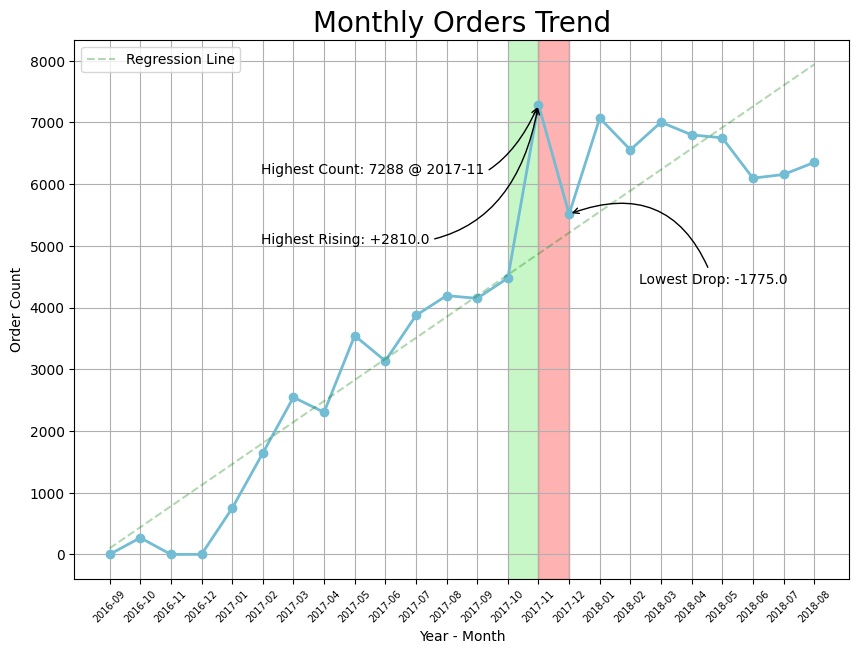

In [135]:
# Visualisasi Pola Penjualan Bulanan

# Buat kolom berisi perbedaan value order_count di tiap bulan
monthly_orders_df['order_count_difference'] = monthly_orders_df['order_count'].diff()

# Find the index of the month with the highest increase and lowest decrease in order_count
max_increase_index = monthly_orders_df['order_count_difference'].idxmax()
min_decrease_index = monthly_orders_df['order_count_difference'].idxmin()


# Cari bulan dengan highest increase in order_count
max_increase_month = monthly_orders_df.loc[max_increase_index, 'order_purchase_timestamp']
max_increase = monthly_orders_df['order_count_difference'].max()

# Cari bulan dengan lowest drop di order_count
min_decrease_month = monthly_orders_df.loc[min_decrease_index, 'order_purchase_timestamp']
min_decrease = monthly_orders_df['order_count_difference'].min()

# Plotting Data
plt.figure(figsize=(10, 7))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")

# Buat garis regresi untuk order_count
x_values = np.arange(len(monthly_orders_df))
regression_coefficients = np.polyfit(x_values, monthly_orders_df['order_count'], 1)
regression_line = np.polyval(regression_coefficients, x_values)
plt.plot(monthly_orders_df['order_purchase_timestamp'], regression_line, color='green', alpha=0.3, linestyle='--', label='Regression Line')

# Beri anotasi global top order_count
max_order_count = monthly_orders_df['order_count'].max()
max_order_month = monthly_orders_df.loc[monthly_orders_df['order_count'].idxmax(), 'order_purchase_timestamp']
plt.annotate(f'Highest Count: {max_order_count} @ {max_order_month}', xy=(max_order_month, max_order_count), xytext=(-200, -50),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

# Beri anotasi lowest drop value
plt.annotate(f'Lowest Drop: {min_decrease}', xy=(min_decrease_month, monthly_orders_df.loc[monthly_orders_df['order_purchase_timestamp'] == min_decrease_month, 'order_count'].iloc[0]), xytext=(50, -50),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

# Beri anotasi highest rising value
plt.annotate(f'Highest Rising: +{max_increase}', xy=(max_increase_month, monthly_orders_df.loc[max_increase_index, 'order_count']), xytext=(-200, -100),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

# Menambahkan highlight untuk highest rising dan lowest decrase
if max_increase_index > 0:  # Pastikan tidak di luar bounds
    highlight_start = monthly_orders_df['order_purchase_timestamp'].iloc[max_increase_index - 1]
    highlight_end = monthly_orders_df['order_purchase_timestamp'].iloc[max_increase_index]
    plt.axvspan(highlight_start, highlight_end, color='lightgreen', alpha=0.5)

if min_decrease_index > 0:  # Pastikan tidak di luar bounds
    highlight_start = monthly_orders_df['order_purchase_timestamp'].iloc[min_decrease_index - 1]
    highlight_end = monthly_orders_df['order_purchase_timestamp'].iloc[min_decrease_index]
    plt.axvspan(highlight_start, highlight_end, color='red', alpha=0.3)

# Setup Labels & Titles
plt.xlabel('Year - Month')
plt.ylabel('Order Count')
plt.title("Monthly Orders Trend", loc="center", fontsize=20)
plt.xticks(fontsize=7)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()


Visualisasi Pola Persebaran Pelanggan/Pembeli Berdasarkan Wilayah

<ipython-input-136-73bf90267e32>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="customer_city", data=orderByCity.sort_values(by="order_id", ascending=False).head(10), palette=colors, ax=ax[0])
<ipython-input-136-73bf90267e32>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="customer_state", data=orderByState.sort_values(by="order_id", ascending=False).head(10), palette=colors, ax=ax[1])


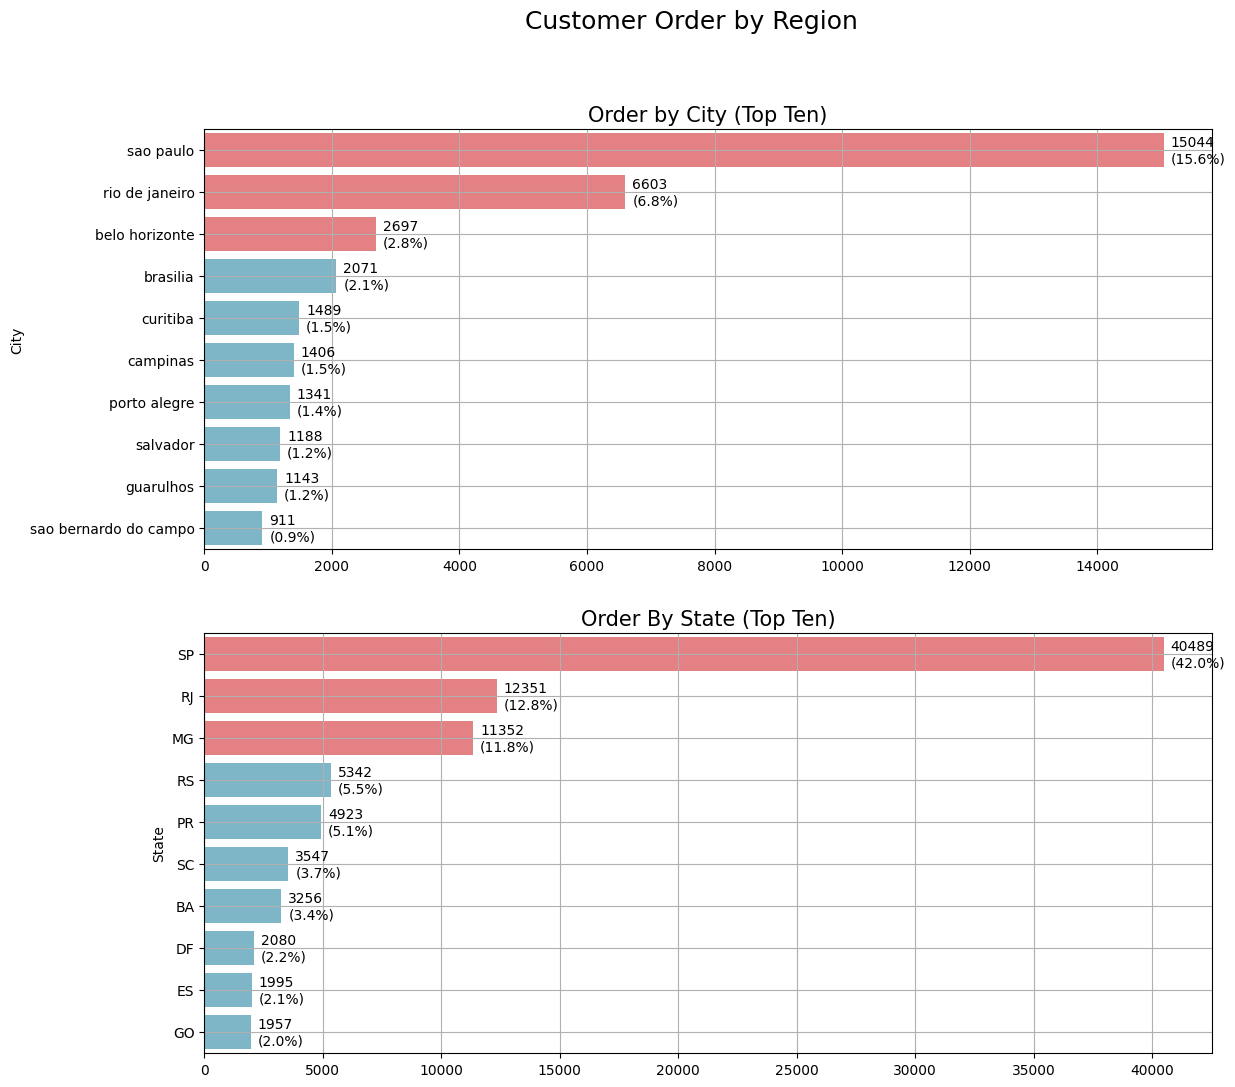

In [136]:
# Buat visualisasi sederhana (bar chart sorted)

# Bikin slot chart
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(13, 12))
colors = ["#F47174", "#F47174", "#F47174", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.grid(True)

# Hitung total orders city dan state buat bikin anotasi value dan percentage nanti
total_orders_city = orderByCity["order_id"].sum()
total_orders_state = orderByState["order_id"].sum()

# ORDER BY CITY
sns.barplot(x="order_id", y="customer_city", data=orderByCity.sort_values(by="order_id", ascending=False).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel('City')
ax[0].set_xlabel(None)
ax[0].set_title("Order by City (Top Ten)", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)
ax[0].grid(True)

# Beri anotasi tiap bar dengan value dan percentage
for p in ax[0].patches:
    width = p.get_width()
    ax[0].annotate(f'{width:.0f}\n({width/total_orders_city:.1%})',
                   (p.get_x() + width, p.get_y() + p.get_height() / 2),
                   ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

# ORDER BY STATE
sns.barplot(x="order_id", y="customer_state", data=orderByState.sort_values(by="order_id", ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel('State')
ax[1].set_xlabel(None)
ax[1].set_title("Order By State (Top Ten)", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=10)
ax[1].grid(True)

# Beri anotasi tiap bar dengan value dan percentage
for p in ax[1].patches:
    width = p.get_width()
    ax[1].annotate(f'{width:.0f}\n({width/total_orders_state:.1%})',
                   (p.get_x() + width, p.get_y() + p.get_height() / 2),
                   ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')


plt.suptitle("Customer Order by Region", fontsize=18)

plt.show()

###Pertanyaan 2: Kapan pelanggan terakhir kali bertransaksi, seberapa sering, berapa spendingnya, siapa dia?

Dari visualisasi data 'Best Customer Based on RFM Parameters. Kita bisa menemukan 10 sampel customer terbaik dari segi:

* Recency = dengan asumsi present_date adalah 1 hari setelah tanggal terakhir yang ada di dataset, kita bisa melihat 10 customer yang melakukan transaksi terakhir (2018-08-29 15:00:37)
* Frequency = dari bar chart, ada 10 sampel customer yang paling sering bertransaksi dan pada urutan teratas ada 1 customer yang sangat loyal karena dia telah melakukan 14 kali purchase.
* Monetary = secara nominal transaksi, terdapat 1 customer yang mungkin cocok dijadikan sebagai customer prioritas karena dia telah melakukan transaksi dengan total nominal 100.000 (asumsi unit currency = USD)

Visualisasi RFM Analysis

<ipython-input-137-dc28560b565e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Recency", y="customer_unique_id", data=rfm_df.sort_values(by="Recency", ascending=True).head(10), palette=colors, ax=ax[0])
<ipython-input-137-dc28560b565e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="customer_unique_id", data=rfm_df.sort_values(by="Frequency", ascending=False).head(10), palette=colors, ax=ax[1])
<ipython-input-137-dc28560b565e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Monetary", y="customer_unique_id", da

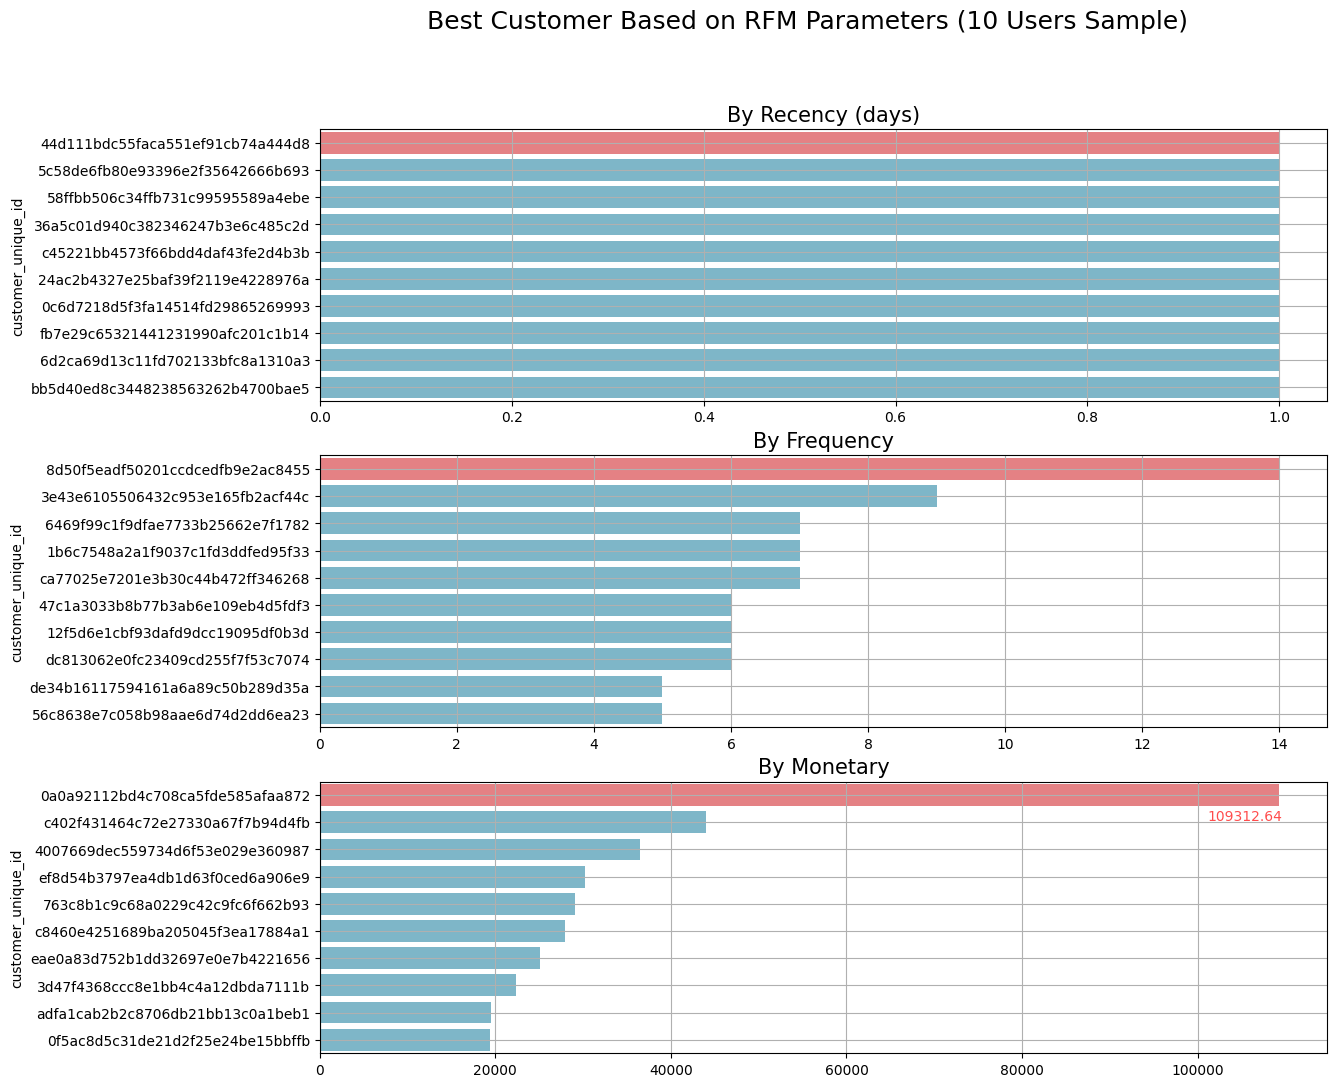

In [137]:
# Visualisasi RFM Analysis

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(13, 12))
colors = ["#F47174", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.grid(True)

# RECENCY
sns.barplot(x="Recency", y="customer_unique_id", data=rfm_df.sort_values(by="Recency", ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel('customer_unique_id')
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)
ax[0].grid(True)

# FREQ
sns.barplot(x="Frequency", y="customer_unique_id", data=rfm_df.sort_values(by="Frequency", ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel('customer_unique_id')
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=10)
ax[1].grid(True)

# MONETARY
sns.barplot(x="Monetary", y="customer_unique_id", data=rfm_df.sort_values(by="Monetary", ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel('customer_unique_id')
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis ='y', labelsize=10)
ax[2].grid(True)

# Menambahkan anotasi untuk customer_unique_id pertama di bar chart ketiga (monetary)
top_monetary_value = rfm_df.sort_values(by="Monetary", ascending=False).head(10).iloc[0]['Monetary']
top_customer = rfm_df.sort_values(by="Monetary", ascending=False).head(10).iloc[0]['customer_unique_id']
ax[2].annotate(f'{top_monetary_value:.2f}',
               xy=(top_monetary_value, 0),
               xytext=(-25, -20),
               textcoords='offset points',
               ha='center',
               va='bottom',
               fontsize=10,
               color='red',
               alpha=0.7)

plt.suptitle("Best Customer Based on RFM Parameters (10 Users Sample)", fontsize=18)

plt.show()

##Conclusion

Dari dataset E-Commerce tersebut, ada 2 pertanyaan bisnis yang diajukan. Pertama, terkait pola penjualan yang terjadi pada seluruh periode (diaggregasi dalam unit bulan) dan bagaiaman pola persebaran atau demografi dari pelanggan berdasarkan wilayah (kota dan state). Kedua, terkait RFM analysis yang menyinggung interaksi transaksi antara E-commerce dengan pelanggan.

Dapat disimpulkan bahwa pola penjualan mengalami peningkatan selama bulan berjalan hingga akhirnya terjadi stagnansi jumlah order di 8 bulan terakhir, dengan jumlah order terbanyak pada November 2017 sebesar 7288 order. Terkait demografi pelanggan, Sao Paulo menjadi kota maupun state yang memiliki basis pelanggan terbesar. Terakhir, RFM analysis menunjukkan transaksi terakhir terjadi di 29 Agustus 2018, terdapat 1 customer dengan frekuensi transaksi 14 kali, serta 1 customer dengan nominal transaksi lebih dari 100.000.

Stakeholder E-Commerce dapat memanfaatkan insight ini untuk menentukan ekspansi jalur distribusi yang lebih dekat dan memprioritaskan daerah dengan high order seperti Sao Paula, mengevaluasi secara konkrit mengapa dalam 8 bulan terakhir terjadi stagnansi jumlah order, serta merancang targeted customer relationship strategy pada strategic buyer yang identitasnya telah diketahui.

Terima kasih.

In [138]:
all_df.to_csv("all_data.csv", index=False)